In [60]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Understanding the dataset

In [32]:
# load one month
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/my_csv/Feb_18.csv'
data = pd.read_csv(fname, low_memory=False, index_col=0)

In [33]:
# get rid of arabic columns
cols = data.columns
# new columns without the arabic ones

drop_cols = []
print(f'Dataframe shape before dropping" {data.shape}')
for c in cols:
    _ = re.findall(r'_ar', c)
    if len(_) > 0:
        drop_cols.append(c)

print(f'Cols {drop_cols} will be dropped.')
data = data.drop(columns=drop_cols)
print(f'Dataframe shape after dropping" {data.shape}')

Dataframe shape before dropping" (2269, 344)
Cols ['admin1Name_ar', 'admin2Name_ar', 'admin3Name_ar', 'admin4Name_ar'] will be dropped.
Dataframe shape after dropping" (2269, 340)


In [85]:
data['q_gov'].value_counts()
data['q_water_price3'].value_counts()

4000.0    14
3000.0    14
2500.0     9
3500.0     9
5000.0     7
3800.0     5
4500.0     5
2300.0     4
2700.0     4
2800.0     4
1700.0     3
3100.0     2
4600.0     2
3200.0     2
5500.0     2
2100.0     2
3700.0     1
5400.0     1
3900.0     1
8000.0     1
2750.0     1
3750.0     1
2000.0     1
7000.0     1
Name: q_water_price3, dtype: int64

### Item per kilo prices

In [91]:
# load item per kilo prices
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/mm_combined_sep_2019.xlsx'
data_comb = pd.read_excel(fname, sheet_name=0)
prices_names = [] # list of item prices per kilo
tmp = data_comb['name'].tolist()

for item in tmp:
    if type(item) == str:
        _ = re.findall(r'price', item)
        if len(_) > 0:
            prices_names.append(item) 
prices_names = [p for p in prices_names if not 'display' in p]
for p in prices_names:
    tmp = prices_names.copy()
    tmp.remove(p)
    for item in tmp: 
        if f'{p}_per' in item:
            print(p)

q_flour_price
q_rice_price
q_bulgur_price
q_rlentils_price
q_split_lentils_price
q_ghee_price
q_sugar_price
q_potatoes_price
q_tomatoes_price
q_onions_price
q_cucumbers_price
q_tea_price
q_tomatop_price
q_chicken_price
q_oil_price
q_eggs_price
q_milk_price
q_salt_price
q_bread_price
q_milk_powder_price
q_baby_formula_price
q_chickpeas_price
q_green_peas_price
q_pasta_price
q_canned_fish_price
q_lsoap_price
q_isoap_price
q_dsoap_price
q_toothp_price
q_spads_price
q_diaper_price
q_data_price


In [83]:

prices_names

['q_flour_price',
 'q_flour_price_per_kilo',
 'q_rice_price',
 'q_rice_price_per_kilo',
 'q_bulgur_price',
 'q_bulgur_price_per_kilo',
 'q_rlentils_price',
 'q_rlentils_price_per_kilo',
 'q_split_lentils_price',
 'q_split_lentils_price_per_kilo',
 'q_ghee_price',
 'q_ghee_price_per_kilo',
 'q_sugar_price',
 'q_sugar_price_per_kilo',
 'q_potatoes_price',
 'q_potatoes_price_per_kilo',
 'q_tomatoes_price',
 'q_tomatoes_price_per_kilo',
 'q_onions_price',
 'q_onions_price_per_kilo',
 'q_cucumbers_price',
 'q_cucumbers_price_per_kilo',
 'q_tea_price',
 'q_tea_price_per_kilo',
 'q_tomatop_price',
 'q_tomatop_price_per_kilo',
 'q_chicken_price',
 'q_chicken_price_per_kilo',
 'q_oil_price',
 'q_oil_price_per_litre',
 'q_eggs_price',
 'q_eggs_price_per_30eggs',
 'q_milk_price',
 'q_milk_price_per_litre',
 'q_salt_price',
 'q_salt_price_per_500g',
 'q_bread_price',
 'q_bread_price_per_8pieces',
 'q_milk_powder_price',
 'q_milk_powder_price_per_kilo',
 'q_baby_formula_price',
 'q_baby_formula_pri

In [62]:

Y = data['q_flour_price_per_kilo_display'].values
Y = Y[np.isfinite(Y)]
plt.boxplot(Y)
plt.show()

KeyError: 'q_flour_price_per_kilo_display'

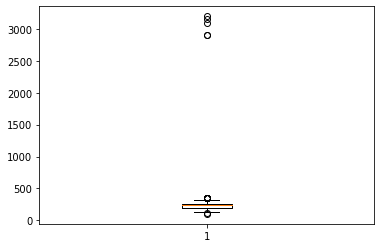

In [57]:
data['q_bulgur_price_per_kilo'].values

array([nan, nan, nan, ..., nan, nan, nan])